# Contents
## 1 Getting insights of data:
### 1.1 General insights:
    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features
### 1.2 Problem specific insights:
    - Missing Value columns & its %, 
        - Stacked bar chart
        - Spectrum chart
    - Numerical variables 
        - Skewed data columns
        - high collinearity columns
    - Categorical Variables
        - high cardinality: 
            - no of distinct values, 
            - columns with all distinct values 
    - Imbalance dataset or not
        - bar graph – frequency %

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 General insights:

    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features

In [164]:
def eda_gen(dataframe):
    df = dataframe

    # No of Nows & Columns
    rows = df.shape[0]
    columns = df.shape[1]

    # Features count
    # No of Categorical features
    try:
        cate_features = df.dtypes.value_counts()[0]
    except:
        cate_features = 0
    # No of Numerical features
    try:
        num_features = df.dtypes.value_counts()[1]
    except:
        num_features = 0    
    # No of bool features    
    try:
        bool_features = df.dtypes.value_counts()[2]
    except:
        bool_features = 0    
    
    print('\033[4m' + '\033[94m'+ 'General insights:' + "\033[0;0m",
          '\nNo of rows :               ', rows,
          '\nNo of columns:             ',columns, 
          '\nNo of categorical features:', cate_features, 
          '\nNo of Numarical features:  ', num_features, 
          '\nNo of Boolean features:    ', bool_features)

In [165]:
eda_gen(df)

General insights: 
No of rows :                245725 
No of columns:              11 
No of categorical features: 7 
No of Numarical features:   4 
No of Boolean features:     0


### 1.2 Problem specific insights:
    - Missing Value columns & its %, 
        - Stacked bar chart
        - Spectrum chart
    - Numerical variables 
        - Skewed data columns
        - high collinearity columns
    - Categorical Variables
        - high cardinality: 
            - no of distinct values, 
            - columns with all distinct values 
    - Imbalance dataset or not
        - bar graph – frequency %

In [54]:
class eda_prob_spec:
    def __init__(self, dataframe):
        self.df = dataframe
    def missing_value_df(self):
        not_null_count = self.df.notnull().sum()
        null_count = self.df.isnull().sum()
        null_percentage = self.df.isnull().sum() * 100 / len(df)
        not_null_percentage = 100 - null_percentage
        missing_value_df = pd.DataFrame({'not_null_count': not_null_count,
                                         'null_count': null_count,
                                         'not_null_percent': not_null_percentage,
                                         'null_percent': null_percentage})
        missing_value_df.sort_values('null_percent', ascending=False, inplace=True)
        missing_value_df = missing_value_df[missing_value_df['null_count']>0]
        self.missing_value_df=missing_value_df
        return(missing_value_df)
    def missing_value_plot(self):
        plt = self.missing_value_df.iloc[:,[2,3]].plot(kind= 'bar', stacked=True)
        return plt

,not_null_count,null_count,not_null_percent,null_percent
Credit_Product,216400,29325,88.065927,11.934073


<AxesSubplot:>

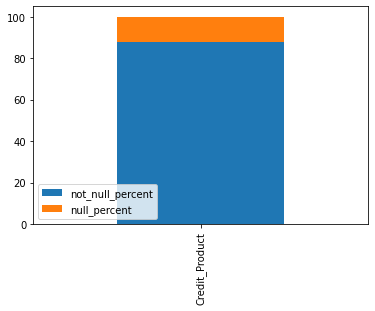

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #"last_expr"

df_null_stats = eda_prob_spec(df)
df_null_stats.missing_value_df()
df_null_stats.missing_value_plot()

In [102]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [103]:
# Check whether all Dtypes are proper or not, else convert to relevent datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [108]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [111]:
printmd("**bold text**")

**bold text**